In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np; np.set_printoptions(precision=4); np.random.seed(0)
import torch; torch.set_printoptions(precision=4)
seed = 1

torch.manual_seed(seed)
import torch.nn as nn
import matplotlib.pyplot as plt; plt.rc('font', size=12); 
import matplotlib 
from matplotlib.font_manager import FontProperties
from mpl_toolkits import mplot3d
import matplotlib.pylab as pl
import seaborn as sns
import time
import sys
import itertools
import random; random.seed(0)
import scipy
import os
import warnings

from textwrap import wrap
from scipy.stats import wilcoxon
from sklearn.metrics.pairwise import cosine_similarity

sys.path.append("../two_module_rnn/code")
os.chdir('/home/yl4317/Documents/two_module_rnn/code')
from model_working import *
from functions import *
os.chdir('/home/yl4317/Documents/two_module_rnn/')

print(torch.__version__)
print(sys.version)
                
%matplotlib inline

torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True) 
torch.backends.cudnn.deterministic = True    

1.13.1+cu116
3.10.8 (main, Nov 24 2022, 14:13:03) [GCC 11.2.0]


# Generate data

In [5]:
start = time.time()

all_data_opto_perf = []

for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if ('2023-05-10' in model_name) and 'wcst' in model_name and ('success' in model_name):
        print(model_name)
        path_to_file = '/scratch/yl4317/two_module_rnn/saved_models/' + model_name
        
        with HiddenPrints():
            model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file, model_name=model_name, simple=False, plot=False, toprint=False)
        
        with open('/scratch/yl4317/two_module_rnn/saved_testdata/{}_testdata_silencePFCVIP_noiseless_no_current_matrix'.format(model_name), 'rb') as f: 
            neural_data_silencePFCVIP = pickle.load(f)  
        test_data_inhibit_pfcvip = neural_data_silencePFCVIP['test_data']
        mean_perf_inhibit_pfcvip = np.mean([_[0] for _ in test_data_inhibit_pfcvip['perfs']])
        mean_perf_rule_inhibit_pfcvip = np.mean([_[0] for _ in test_data_inhibit_pfcvip['perf_rules']])
        
        with open('/scratch/yl4317/two_module_rnn/saved_testdata/{}_testdata_noiseless_no_current_matrix'.format(model_name), 'rb') as f:
            neural_data = pickle.load(f)
        test_data_intact = neural_data['test_data']
        mean_perf_intact = np.mean([_[0] for _ in test_data_intact['perfs']])
        mean_perf_rule_intact = np.mean([_[0] for _ in test_data_intact['perf_rules']])
        if mean_perf_intact<=0.8 or mean_perf_rule_intact<=0.8:
            print('low perf, pass ({}/{})'.format(mean_perf_intact, mean_perf_rule_intact))
            continue
        
        
        all_data_opto_perf.append({'hp': hp_test,
                                 'mean_perf_intact': mean_perf_intact, 
                                 'mean_perf_rule_intact': mean_perf_rule_intact, 
                                 'mean_perf_inhibit_pfcvip': mean_perf_inhibit_pfcvip,
                                 'mean_perf_rule_inhibit_pfcvip': mean_perf_rule_inhibit_pfcvip})   
        

with open('/home/yl4317/Documents/two_module_rnn/processed_data/perf_inhibit_pfcvip.pickle', 'wb') as handle:
    pickle.dump(all_data_opto_perf, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(time.time()-start)

success_2023-05-10-14-28-42_wcst_105_sparsity0
success_2023-05-10-14-28-42_wcst_106_sparsity0
success_2023-05-10-14-28-42_wcst_10_sparsity0
success_2023-05-10-14-28-42_wcst_112_sparsity0
low perf, pass (0.0/0.0)
success_2023-05-10-14-28-42_wcst_115_sparsity0
low perf, pass (0.125/0.02500000037252903)
success_2023-05-10-14-28-42_wcst_116_sparsity0
success_2023-05-10-14-28-42_wcst_118_sparsity0
success_2023-05-10-14-28-42_wcst_121_sparsity0
success_2023-05-10-14-28-42_wcst_122_sparsity0
success_2023-05-10-14-28-42_wcst_124_sparsity0
success_2023-05-10-14-28-42_wcst_126_sparsity0
success_2023-05-10-14-28-42_wcst_131_sparsity0
success_2023-05-10-14-28-42_wcst_134_sparsity0
success_2023-05-10-14-28-42_wcst_136_sparsity0
success_2023-05-10-14-28-42_wcst_139_sparsity0
success_2023-05-10-14-28-42_wcst_142_sparsity0
success_2023-05-10-14-28-42_wcst_143_sparsity0
success_2023-05-10-14-28-42_wcst_144_sparsity0
success_2023-05-10-14-28-42_wcst_149_sparsity0
success_2023-05-10-14-28-42_wcst_150_spa

NameError: name 'all_data_frompfc' is not defined

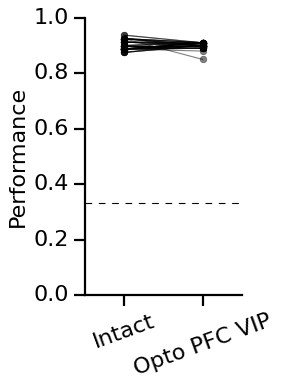

student t test, 0.03420769635180947, p=0.48638919094743627, n=52


In [10]:
with open('/home/yl4317/Documents/two_module_rnn/processed_data/perf_inhibit_pfcvip.pickle', 'rb') as handle:
    all_data_opto_perf = pickle.load(handle)
    
data_suppfig5f_inhibitpfcvip = {'intact': [], 'inhibit_pfcvip': []}

perf_intact = [data['mean_perf_intact'] for data in all_data_opto_perf]
perf_inhibit_pfcvip = [data['mean_perf_inhibit_pfcvip'] for data in all_data_opto_perf]

fig, ax = plt.subplots(1, 1, figsize=[3.5, 5])
plt.style.use('classic')
fig.patch.set_facecolor('white')
ax.plot([perf_intact, perf_inhibit_pfcvip], color='k', alpha=0.5, marker='o')
ax.set_xticks([0, 1])
ctype='PFC VIP'
ax.set_xticklabels(['Intact', 'Opto {}'.format(ctype)], rotation=20)
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([0, 1])
ax.axhline(y=1/3, linestyle='dashed', color='k')
ax.set_ylabel('Performance', fontsize=20)
make_pretty_axes(ax)
fig.tight_layout()
plt.show()
# fig.savefig('/home/yl4317/Documents/two_module_rnn/figs/perf_inhibit_pfcvip.pdf')

# statistical test
ttest = stats.ttest_ind(perf_intact, perf_inhibit_pfcvip, alternative='greater')
print('student t test, {}, p={}, n={}'.format(ttest[0], ttest[1], len(perf_intact)))

# source data
data_suppfig5f_inhibitpfcvip['intact'] = perf_intact
data_suppfig5f_inhibitpfcvip['inhibit_pfcvip'] = perf_inhibit_pfcvip
# pd.DataFrame.from_dict(data=data_suppfig5f_inhibitpfcvip, orient='index').to_csv('/home/yl4317/Documents/two_module_rnn/source_data/suppfig5f_perf_inhibitPFCVIP.csv', header=False)
    